<a href="https://colab.research.google.com/github/Atikahdr/DiabetesData/blob/main/DiabetesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.2 MB/s eta 0:00:00


In [3]:
import streamlit as st
print(st.__version__)

1.49.1


In [4]:
import numpy as np
print(np.__version__)

2.0.2


# 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

# 2. Connect G-Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/Multiclass Diabetes Dataset.csv")
diabetes_data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


In [8]:
diabetes_data.shape

(264, 12)

In [9]:
diabetes_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [10]:
diabetes_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


## Exploratory Data Analysis

## Cleaning Data

Dalam konteks medis, kolesterol total tidak mungkin 0 (harusnya minimal > 100 mg/dL atau > 2 mmol/L).

Jadi kemungkinan ada salah input, atau hasil lab tidak tercatat, lalu ditulis 0.

In [11]:
# Cek jumlah data Chol = 0
zero_chol = diabetes_data[diabetes_data['Chol'] == 0]
print("Jumlah data dengan Chol = 0:", zero_chol.shape[0])


Jumlah data dengan Chol = 0: 1


In [12]:
# Hitung median Chol (dari data valid > 0)
median_chol = diabetes_data[diabetes_data['Chol'] > 0]['Chol'].median()

# Ganti nilai Chol = 0 dengan median
diabetes_data.loc[diabetes_data['Chol'] == 0, 'Chol'] = median_chol

print("Nilai median Chol:", median_chol)
print("Cek ulang min Chol:", diabetes_data['Chol'].min())

Nilai median Chol: 4.5
Cek ulang min Chol: 0.5


In [13]:
diabetes_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.611439,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.257443,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.500000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.900000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [14]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [15]:
diabetes_data.isnull().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


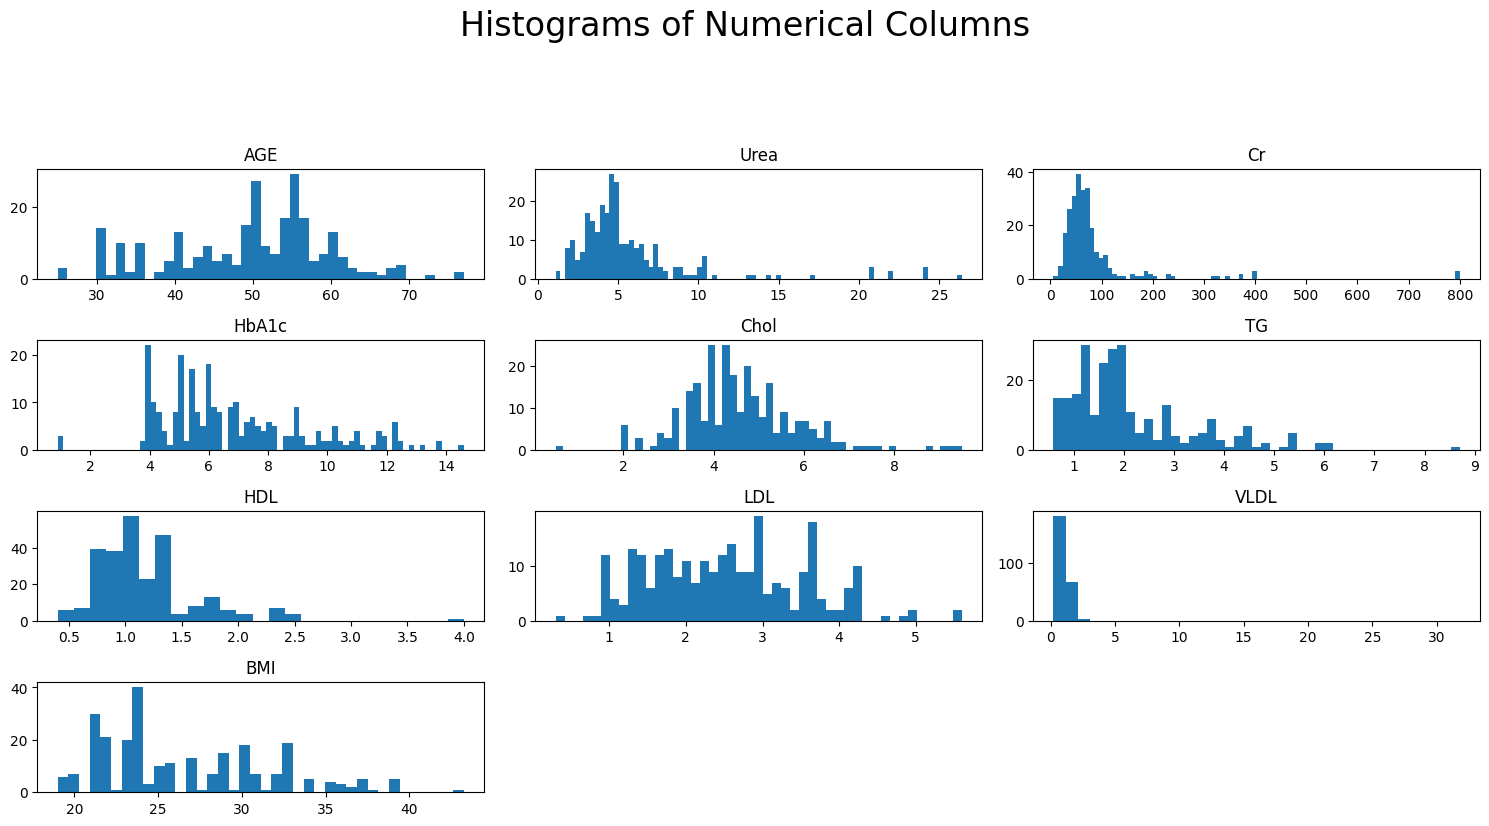

In [17]:
# Exploratory Data Analysis
# Plot Histogram of numeric Columns

dataset = diabetes_data[
    [
        'AGE',
        'Urea',
        'Cr',
        'HbA1c',
        'Chol',
        'TG',
        'HDL',
        'LDL',
        'VLDL',
        'BMI'
    ]
]

# Histogram

fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns\n',
    horizontalalignment="center",
    fontstyle = "normal",
    fontsize = 24,
    fontfamily = "sans-serif"
)

for i in range (dataset.shape[1]):
    plt.subplot(6, 3, i +1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    if vals >100:
      vals = 100

    plt.hist(dataset.iloc[:,i], bins=vals)#, color='#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

Answer:

1.   AGE
      *   Distribusi usia cenderung menumpuk di rentang 30–50 tahun. Ada outlier di atas 60 tahun, tapi jumlahnya sedikit.
2.   Urea
      *   Mayoritas nilai urea berada di bawah 10, tetapi ada ekor panjang (right-skewed) menunjukkan outlier dengan nilai tinggi.
3.   Cr (Creatinine)
      *   Sangat right-skewed dengan banyak outlier di nilai tinggi (>200). Mayoritas pasien punya nilai Cr rendah (<20).
4.   HbA1c (Hemoglobin A1c)
      *   Distribusi bervariasi, tetapi banyak pasien dengan HbA1c antara 5–8.
5.   Chol (Kolesterol)
      *   Distribusi relatif normal, dengan puncak di sekitar 4–6. Artinya sebagian besar pasien punya kolesterol total dalam rentang normal.
6.   TG (Triglycerides)
      *   Distribusi right-skewed → banyak pasien dengan TG rendah (1–3), tapi ada beberapa dengan nilai tinggi (>6).
7.   HDL (High Density Lipoprotein)
      *   Sebagian besar nilai HDL di rentang 1–2, jarang yang >3. Artinya banyak pasien mungkin memiliki HDL rendah (kurang protektif terhadap penyakit jantung).
8.   LDL (Low Density Lipoprotein)
      *   Distribusi cenderung normal dengan mayoritas di sekitar 2–4.
9.  VLDL (Very Low Density Lipoprotein)
       *   Mirip TG, cenderung right-skewed dengan mayoritas <10.
10.  BMI (Body Mass Index)
       *   Sebagian besar pasien punya BMI antara 20–30, kategori normal sampai overweight.
       *   Ada juga yang >35, indikasi obesitas.

## Check Target Variable Distribution

In [18]:
diabetes_data["Class"].value_counts()

,count
Class,
2,128
0,96
1,40


In [19]:
# Check Target Variable Distribution
diabetes_data["Class"].value_counts(normalize=True)

,proportion
Class,
2,0.484848
0,0.363636
1,0.151515


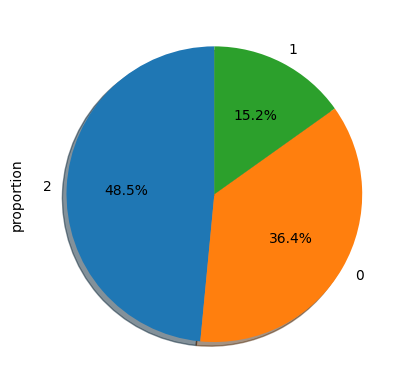

In [20]:

(
    diabetes_data["Class"]
    .value_counts(normalize=True)
    .plot(
        kind = 'pie',
        autopct = '%1.1f%%',
        startangle=90,
        shadow=True
    )
);

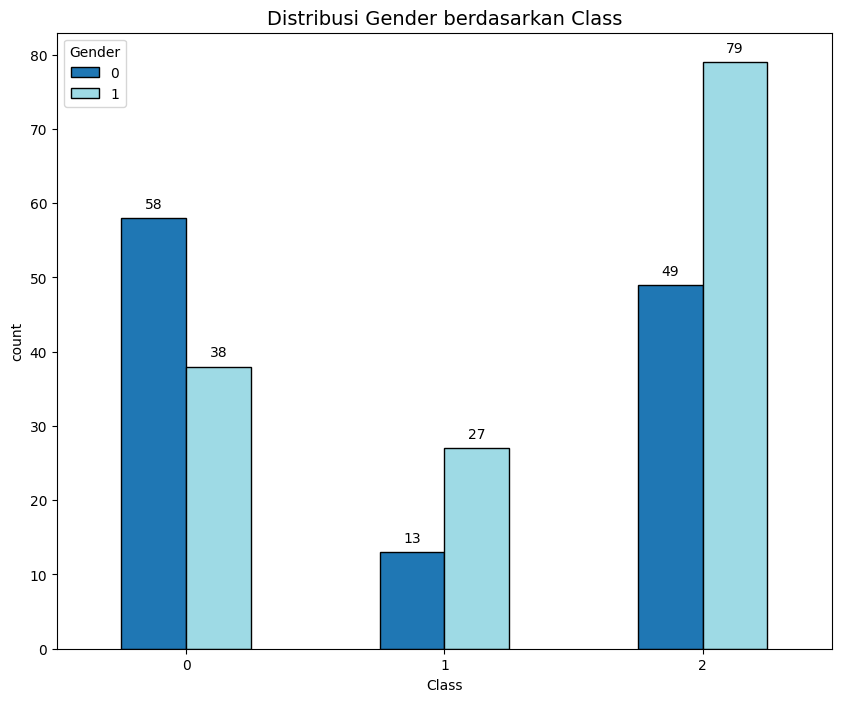

In [21]:
# Buat tabel distribusi
cat_dist = pd.crosstab(diabetes_data["Class"], diabetes_data["Gender"])

# Plot bar chart
ax = cat_dist.plot(
    kind="bar",
    figsize=(10,8),
    colormap="tab20",  # bisa ganti dengan "tab10", "Paired", dll.
    edgecolor="black"
)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

# Tambahkan label jumlah di atas setiap bar
add_value_labels(ax)

plt.title("Distribusi Gender berdasarkan Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("count")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()


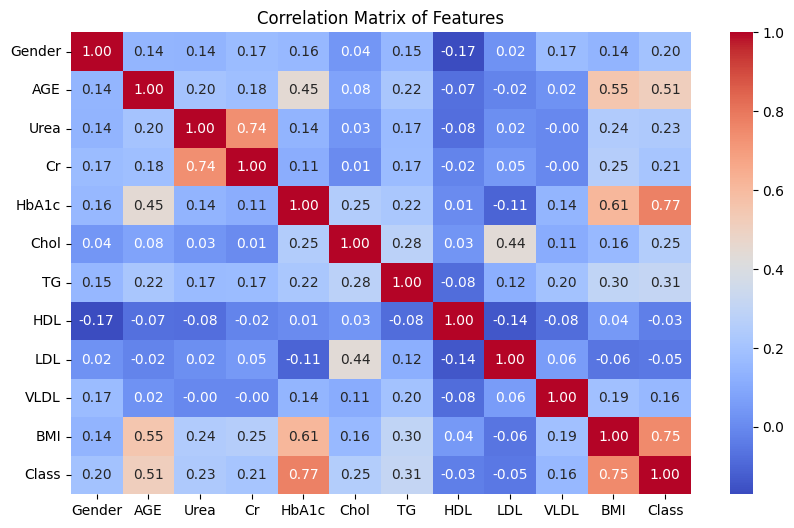

In [22]:
corr = diabetes_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

**Korelasi antar fitur**
* Urea & Cr → sangat tinggi (0.74) → kemungkinan multikolinearitas, perlu diperhatikan jika menggunakan model linear.
* BMI & HbA1c → tinggi (0.61) → bisa saling terkait.
* BMI & AGE → moderat (0.55).
* HbA1c & AGE → sedang (0.45).

## Feature Engineering

In [23]:
# === Feature Engineering untuk diabetes_data ===

# 1. Rasio Urea/Cr (fungsi ginjal)
diabetes_data["Urea_Cr_Ratio"] = diabetes_data["Urea"] / diabetes_data["Cr"]

# 2. Interaksi BMI × HbA1c
diabetes_data["BMI_HbA1c"] = diabetes_data["BMI"] * diabetes_data["HbA1c"]

# 3. Interaksi AGE × BMI
diabetes_data["AGE_BMI"] = diabetes_data["AGE"] * diabetes_data["BMI"]

# 4. Optional: drop salah satu TG atau VLDL (karena hampir identik)
diabetes_data = diabetes_data.drop(columns=["TG"])   # drop TG, simpan VLDL

# 5. (Opsional) Normalisasi / Standarisasi setelah feature engineering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data.drop(columns=["Class"]))
diabetes_scaled = pd.DataFrame(scaled_features,
                               columns=diabetes_data.drop(columns=["Class"]).columns)
diabetes_scaled["Class"] = diabetes_data["Class"]

# Preview hasil feature engineering
diabetes_scaled.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,HDL,LDL,VLDL,BMI,Urea_Cr_Ratio,BMI_HbA1c,AGE_BMI,Class
0,-1.095445,0.047217,-0.243168,-0.401231,-0.772794,-0.327825,2.676598,-1.132823,-0.316475,-0.516691,0.403725,-0.754933,-0.318061,0
1,0.912871,-2.327116,-0.293227,-0.239960,-0.772794,-0.726212,-0.182261,-0.431615,-0.284154,-0.713387,-0.172884,-0.805559,-1.619848,0
2,0.912871,-1.634602,0.357546,-0.401231,-0.772794,0.229918,-0.841997,-0.531788,-0.348796,-1.106778,1.420305,-0.906810,-1.414417,0
3,-1.095445,-0.447436,-0.843881,-0.622980,-1.127156,-1.363632,-0.402173,-1.032651,-0.348796,-1.106778,0.280182,-1.102080,-0.869483,0
4,-1.095445,0.047217,-0.918970,-0.360914,-1.127156,-0.805890,-0.622085,-0.431615,-0.284154,-0.516691,-0.807701,-0.978099,-0.318061,0


**Fitur Baru**

* Urea_Cr_Ratio → biologisnya relevan (fungsi ginjal sering dilihat dari rasio Urea/Creatinine).

* BMI_HbA1c → menggabungkan obesitas (BMI) dengan kontrol gula darah (HbA1c). Bisa memunculkan interaksi baru.

* AGE_BMI → kombinasi faktor umur & obesitas → bisa memengaruhi risiko diabetes

## Split Dataset into Dependent and Independent Variables

In [24]:
# Split dataset into dependent and independent variables-----------------------------------
#identify response variable:

response = diabetes_data['Class']
X = diabetes_data.drop(['Class'], axis=1) # Variabel Independent (fitur)
y = diabetes_data['Class'] # Variabel Dependen (Target)
print("Shape X:", X.shape)
print("Shape Y:", y.shape)

Shape X: (264, 13)
Shape Y: (264,)


## Generate training and test datasets of dependent and independent variables

In [25]:
# Generate training and test datasets of dependent and independent variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42)

# to resolve any class imbalance - use stratify parameter.

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (211, 13)
Shape X_test: (53, 13)
Shape y_train: (211,)
Shape y_test: (53,)



*   Train Set: 211 sampel (80%)
*   Test Set: 53 sampel (20%)



In [26]:
print('Raw Data Target Percentage')
print('Class 0 : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))
print('Class 1 : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Class 2 : {}'.format(response.value_counts()[2]/response.value_counts().sum()*100))

Raw Data Target Percentage
Class 0 : 36.36363636363637
Class 1 : 15.151515151515152
Class 2 : 48.484848484848484


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train),
                        columns = X_train.columns,
                        index = X_train.index)

X_test_scaled = pd.DataFrame(sc_X.transform(X_test),
                       columns = X_test.columns,
                       index = X_test.index)
X_test = X_test_scaled


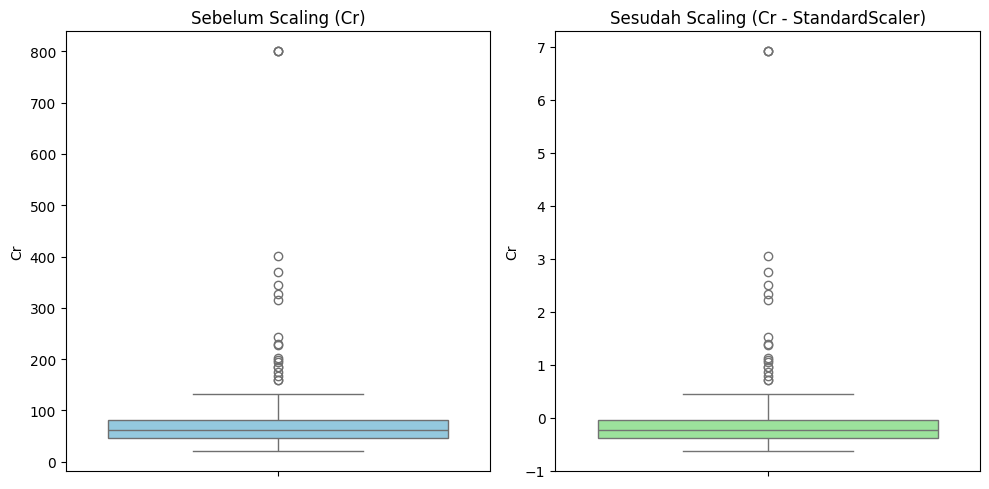

In [28]:
# Bandingkan distribusi Cr sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Sebelum scaling
sns.boxplot(y=X_train["Cr"], ax=axes[0], color="skyblue")
axes[0].set_title("Sebelum Scaling (Cr)")

# Sesudah scaling
sns.boxplot(y=X_train_scaled["Cr"], ax=axes[1], color="lightgreen")
axes[1].set_title("Sesudah Scaling (Cr - StandardScaler)")

plt.tight_layout()
plt.show()

## Modeling Selection

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [30]:
# Custom scorer untuk Multiclass ROC AUC
def multiclass_roc_auc_score(y_true, y_proba, average="macro"):
    return roc_auc_score(y_true, y_proba, multi_class="ovr", average=average)

roc_auc = make_scorer(multiclass_roc_auc_score, needs_proba=True)

#Using Accuracy and ROC AUC Mean Metrics
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0, class_weight='balanced', multi_class='ovr')))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(random_state=0, class_weight='balanced')))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(probability=True, random_state=0, class_weight='balanced')))

# evaluate each model using StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Evaluating Model Results:
results = []

for name, model in models:
    # Accuracy Dengan CV
    cv_acc_results = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    # ROC AUC (pakai predict_proba)
    y_proba = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method="predict_proba")
    cv_auc_results = roc_auc_score(y_train, y_proba, multi_class="ovr", average="macro")

    results.append([
        name,
        round(cv_auc_results * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ])

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'Accuracy Mean', 'Accuracy STD']
model_result = pd.DataFrame(results, columns=col)

# sort hasil berdasarkan ROC AUC Mean
model_result = model_result.sort_values(by=['ROC AUC Mean'], ascending=False)

print("\n=== Model Comparison Results ===")
print(model_result)

# Pilih Model Terbaik
best_model_name = model_result.iloc[0]['Algorithm']
best_model = dict(models)[best_model_name]
best_model.fit(X_train_scaled, y_train)  # training final dengan semua data train

print(f"\nModel terbaik: {best_model_name}")


=== Model Comparison Results ===
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
2        Random Forest         99.26          97.17          2.32
3    Gradient Boosting         98.92          97.62          3.69
1        Decision Tree         98.54          97.62          3.69
5                  SVM         95.85          84.34          4.46
0  Logistic Regression         91.91          86.71          4.94
4                  KNN         91.28          81.52          5.71

Model terbaik: Random Forest


*   ROC AUC Multiclass (macro/ovr) dihitung
dari probabilitas seluruh data hasil cross_val_predict, jadi cuma menghasilkan satu nilai rata-rata.
*   Karena kita tidak menghitung AUC per-fold, maka tidak ada distribusi nilai AUC antar fold, otomatis ROC AUC STD = tidak relevan.

Sedangkan:

*   Accuracy memang dihitung per-fold (karena cross_val_score), jadi kita bisa ambil mean & std.

## Visualize Classfication Algorithms Accuracy Comparisons

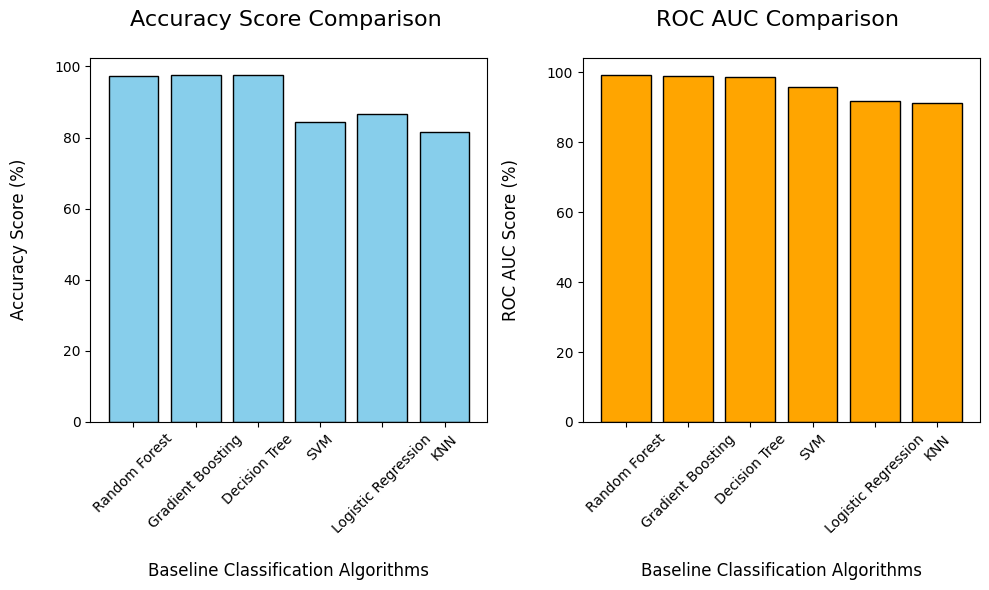

In [31]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Subplot 1 - Accuracy Comparison
axes[0].bar(model_result['Algorithm'], model_result['Accuracy Mean'],
            color='skyblue', edgecolor='black')
axes[0].set_ylabel('Accuracy Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[0].set_title('Accuracy Score Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2 - ROC AUC Comparison
axes[1].bar(model_result['Algorithm'], model_result['ROC AUC Mean'],
            color='orange', edgecolor='black')
axes[1].set_ylabel('ROC AUC Score (%)\n', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_xlabel('\nBaseline Classification Algorithms', horizontalalignment="center",
                   fontstyle="normal", fontsize="large", fontfamily="sans-serif")
axes[1].set_title('ROC AUC Comparison \n', horizontalalignment="center",
                  fontstyle="normal", fontsize=16, fontfamily="sans-serif")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
2    102
0     77
1     32
Name: count, dtype: int64

After SMOTE: Class
1    102
0    102
2    102
Name: count, dtype: int64


## Searching Optimum Number of Trees for Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print(grid_search.best_params_)

{'n_estimators': 50}


## Compare Baseline Classification Algorithms

In [34]:
# 1. Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Fitting Logistic Regression to the Training set
print("\nLogistic Regression")
log_reg = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced', multi_class='ovr')
log_reg.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled) # Ambil semua probabilitas kelas

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_log)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_log, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# 2. Decision Tree
print("\nDecision Tree")
from sklearn.tree import DecisionTreeClassifier

# Fitting Decision Tree to the Training Set:
dt = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=5)
dt.fit(X_train_smote, y_train_smote)

# Prediciting the Test set results
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)

# Evaluate results
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_dt, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 3. Random Forest
print("\nRandom Forest")
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest to the Training set:
rf = RandomForestClassifier(n_estimators=50, random_state=0, class_weight='balanced', max_depth=10)
rf.fit(X_train_smote, y_train_smote)

# Predicting the Test set results
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Logistic Regression
Accuracy: 88.68
ROC AUC: 95.91

Confusion Matrix:
 [[15  3  1]
 [ 0  7  1]
 [ 1  0 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.70      0.88      0.78         8
           2       0.93      0.96      0.94        26

    accuracy                           0.89        53
   macro avg       0.85      0.88      0.86        53
weighted avg       0.90      0.89      0.89        53


Decision Tree
Accuracy: 96.23
ROC AUC: 97.86

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  1 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        26

    accuracy                           0.96        53
   macro avg       0.95      0.97      0.96        53
weighted avg       0.97      0.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#   1. Gradient Boosting
print("\nGradient Boosting")
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_smote, y_train_smote)  # SMOTE sudah dilakukan pada train

y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_gb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_gb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

#   2. Support Vector Machine

print("\nSupport Vector Machine")
svm = SVC(probability=True, random_state=0, class_weight='balanced', kernel='rbf')
svm.fit(X_train_smote, y_train_smote)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


#   3. K-Nearest Neighbors
print("\nK-Nearest Neighbors")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)

print("Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



Gradient Boosting
Accuracy: 96.23
ROC AUC: 99.09

Confusion Matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  1 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        26

    accuracy                           0.96        53
   macro avg       0.95      0.97      0.96        53
weighted avg       0.97      0.96      0.96        53


Support Vector Machine
Accuracy: 90.57
ROC AUC: 98.24

Confusion Matrix:
 [[15  1  3]
 [ 0  8  0]
 [ 1  0 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.89      1.00      0.94         8
           2       0.89      0.96      0.93        26

    accuracy                           0.91        53
   macro avg       0.91      0.92      0.91        53
weighted avg       0.91 

## Visualize the results and compare the baseline algorithms


Model Comparison Results (Multiclass):
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     96.23    97.86      94.63   97.44     95.85   
3    Gradient Boosting     96.23    99.09      94.63   97.44     95.85   
2        Random Forest     96.23    99.85      97.05   94.55     95.64   
4                  SVM     90.57    98.24      90.64   91.70     90.81   
0  Logistic Regression     88.68    95.91      85.45   87.53     85.94   
5                  KNN     86.79    92.54      83.19   85.78     83.46   

   F2 Score  
1     96.86  
3     96.86  
2     95.04  
4     91.49  
0     87.11  
5     85.25  


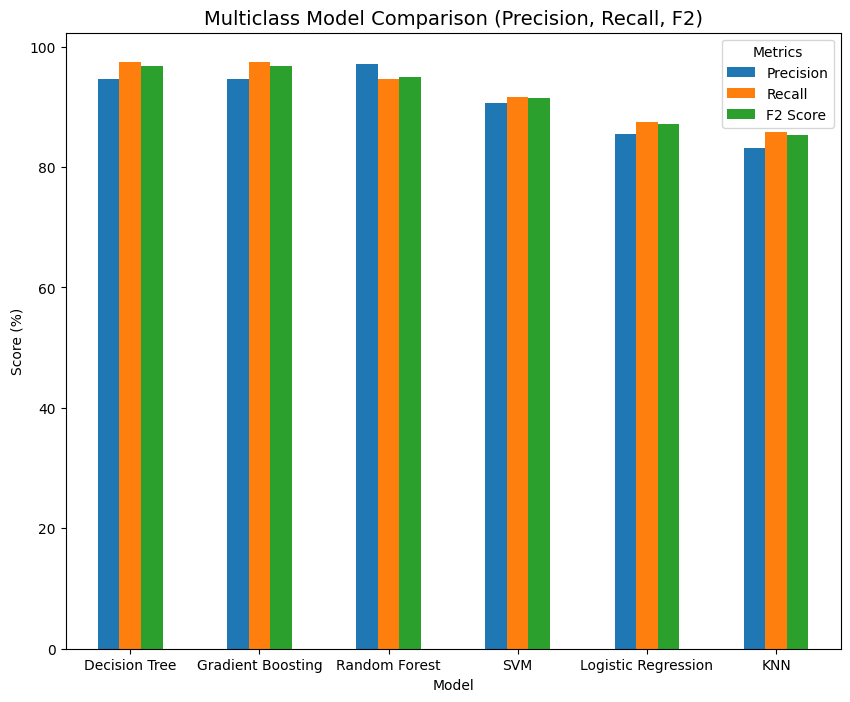

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute metrics + F2 Score (macro average)
def evaluate_model(name, y_test, y_pred, y_prob):
    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    roc = round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")*100, 2)

    # Macro average supaya semua kelas diperlakukan sama
    prec = round(precision_score(y_test, y_pred, average="macro")*100, 2)
    rec = round(recall_score(y_test, y_pred, average="macro")*100, 2)
    f1 = round(f1_score(y_test, y_pred, average="macro")*100, 2)

    # F2 score untuk multiclass → dihitung manual dengan formula macro
    f2 = round(((5*prec*rec) / ((4*prec) + rec + 1e-9)), 2)

    return [name, acc, roc, prec, rec, f1, f2]

# Collect results
results_list = []
results_list.append(evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log))
results_list.append(evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt))
results_list.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results_list.append(evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb))
results_list.append(evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm))
results_list.append(evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn))

# DataFrame hasil
results_smote = pd.DataFrame(results_list,
                             columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall", "F1 Score", "F2 Score"])

# Sort berdasarkan Recall dan F2 (penting untuk imbalance multiclass)
results_smote = results_smote.sort_values(["Recall", "F2 Score"], ascending=False)

print("\nModel Comparison Results (Multiclass):")
print(results_smote)

# Visualization
results_smote.set_index("Model")[["Precision", "Recall", "F2 Score"]].plot(kind="bar", figsize=(10,8))
plt.title("Multiclass Model Comparison (Precision, Recall, F2)", fontsize=14)
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

Kesimpulan Insight

* Model terbaik: ✅ Random Forest → performa paling konsisten dan seimbang.

* Alternatif kuat: Decision Tree (hampir setara, tapi lebih rawan overfitting).

* Model menengah: SVM → masih cukup bagus, bisa dipakai kalau ingin interpretasi lebih mudah.

* Kurang optimal: Logistic Regression & KNN → performa menurun, mungkin karena data tidak linier & fitur kurang terstandarisasi.

* Model gagal: Gradient Boosting → perlu tuning (learning rate, n_estimators) atau mungkin data kurang cocok untuk boosting.

## Train & Evaluate Chosen Model

In [38]:
# Train & Evaluate Chosen Model
# Fit Chosen Model on The Training dataset
chosen_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=None)
chosen_model.fit(X_train_smote, y_train_smote)

# Predict the results
y_pred = chosen_model.predict(X_test)
y_prob = chosen_model.predict_proba(X_test)

# Evaluate Model Result on The Set:
print("--- Random Forest Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))

--- Random Forest Evaluation ---
Confusion Matrix:
[[19  0  0]
 [ 0  7  1]
 [ 1  0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.88      0.93         8
           2       0.96      0.96      0.96        26

    accuracy                           0.96        53
   macro avg       0.97      0.95      0.96        53
weighted avg       0.96      0.96      0.96        53


Accuracy: 0.9622641509433962
ROC AUC: 0.9957992643751158


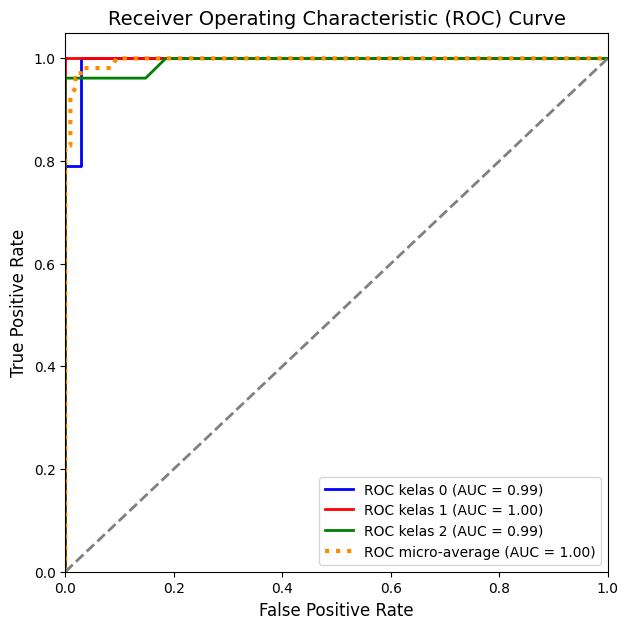

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test untuk multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


# Hitung ROC curve dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Hitung micro-average ROC curve dan AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(7,7))
colors = ["blue", "red", "green"]  # bisa ditambah sesuai jumlah kelas

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC kelas {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

# Micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='darkorange', linestyle=':', linewidth=3)

# Diagonal line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()


Insight dari Hasil:

1. Model hampir sempurna

    * AUC mendekati 1 artinya model sangat mampu membedakan antar kelas.

    * Kelas 0 & 1 benar-benar diprediksi dengan sempurna (AUC = 1).

    * Kelas 2 juga sangat tinggi (0.99).

2. Overfitting kemungkinan besar terjadi

    * AUC yang terlalu tinggi di data test kadang berarti model terlalu “menghafal” pola data (apalagi kalau data train/test tidak benar-benar dipisahkan dengan baik atau dataset kecil).

    * Kalau sebelumnya kamu pakai SMOTE, kadang ini membuat distribusi data test terlalu mirip train → sehingga hasilnya hampir sempurna.

3. Perlu cek dengan metrik lain

    * Lihat juga confusion matrix: apakah benar semua prediksi tepat?

    * Kalau akurasi = 100% di test set → kemungkinan dataset kecil atau model terlalu fit.

    * Kalau dataset besar dan masih 100%, berarti model memang sangat kuat (jarang terjadi, tapi mungkin).

**Rekomendasi Lanjutan:**

* Cross-validation → pastikan hasil konsisten, bukan hanya kebetulan di 1 test split.

* Cek size dataset → kalau data terlalu kecil, hasil 100% kurang bisa digeneralisasi.

* Bandingkan dengan model lain → kalau semua model dapat hasil tinggi, berarti dataset relatif mudah dipisahkan.

* Cek learning curve → apakah model overfitting (train score jauh lebih tinggi dari test score).

## Analysis

### Cek Overfitting pakai plot Learning Curve

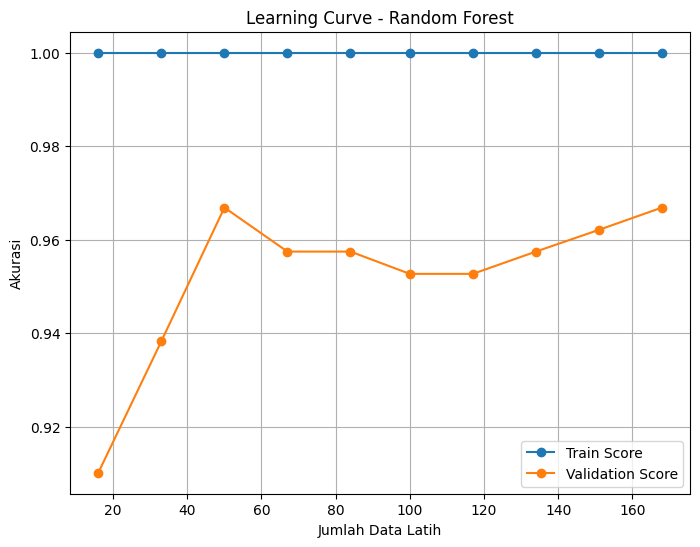

In [40]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Gunakan RandomForest atau model pilihanmu
model = RandomForestClassifier(
    random_state=42, class_weight='balanced',
    n_estimators=200, max_depth=None
)

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Rata-rata hasil
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Train Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("Akurasi")
plt.title("Learning Curve - Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()


**Insight dari grafik:**

* Train Score (biru) hampir sempurna (1.0) di semua jumlah data. Artinya model Random Forest belajar sangat baik pada data training.

* Validation Score (oranye) ada di sekitar 0.95 – 0.97, stabil meskipun data latih bertambah. Artinya model mampu generalisasi dengan baik, tidak hanya hafal data training.

* Gap Train vs Validation memang ada sedikit (~0.03 – 0.05).Ini indikasi sedikit overfitting (wajar untuk Random Forest), tapi masih aman.

**Kesimpulan:**

* Model Random Forest sangat kuat untuk dataset ini.

* Tidak ada masalah underfitting.

* Overfitting sedikit, tapi validation score tetap tinggi (95%+), jadi performanya bagus.

* Kalau ingin mengurangi overfitting, bisa coba:

    * Batasi max_depth pohon.

    * Gunakan lebih sedikit n_estimators.

    * Atur parameter seperti **min_samples_split** atau **min_samples_leaf**.

In [41]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(
    random_state=42, class_weight='balanced',
    n_estimators=200, max_depth=None
)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.95348837 0.95238095 1.         0.92857143 1.        ]
Mean CV accuracy: 0.966888150609081


**Kesimpulan:**

* Model sangat kuat dengan akurasi hampir 97%.

* Tidak ada indikasi overfitting parah, karena performa rata-rata tetap tinggi di semua fold.

* Fold yang lebih rendah (92.8%) bisa menjadi tanda ada beberapa data sulit → mungkin perlu dicek distribusi kelas atau lakukan SMOTE / balancing yang lebih merata.

In [42]:
print('Result Before Oversampling :')
print(model_result)
print(' ')
print('Result After Oversampling :')
print(results_smote)

Result Before Oversampling :
             Algorithm  ROC AUC Mean  Accuracy Mean  Accuracy STD
2        Random Forest         99.26          97.17          2.32
3    Gradient Boosting         98.92          97.62          3.69
1        Decision Tree         98.54          97.62          3.69
5                  SVM         95.85          84.34          4.46
0  Logistic Regression         91.91          86.71          4.94
4                  KNN         91.28          81.52          5.71
 
Result After Oversampling :
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
1        Decision Tree     96.23    97.86      94.63   97.44     95.85   
3    Gradient Boosting     96.23    99.09      94.63   97.44     95.85   
2        Random Forest     96.23    99.85      97.05   94.55     95.64   
4                  SVM     90.57    98.24      90.64   91.70     90.81   
0  Logistic Regression     88.68    95.91      85.45   87.53     85.94   
5                  KNN     86.79   

## Insight dari Hasil

**Before Oversampling**

*   Tree-based models (Random Forest, Gradient Boosting, Decision Tree)

    * ROC AUC > 98% dan Accuracy ~97% → memang sudah performa bagus.
    * Standard Deviation (STD) lebih rendah → lebih stabil dibanding linear models.

*   Linear / distance-based models (SVM, Logistic Regression, KNN)

    * ROC AUC ~91–96%, Accuracy ~81–87% → lebih rendah.
    * STD lebih tinggi → performa kurang stabil.

* **Kesimpulan: memang indikasi masalah data imbalance karena model linear/instance-based kurang optimal.**

**After Oversampling (SMOTE)**

1.   Decision Tree

      * Accuracy 96.23%, ROC AUC 97.86%, Precision & Recall hampir seimbang, F2 = 96.86 → memang bagus untuk problem yang menekankan recall.
      * Unggul Recall & F2 → bagus untuk mendeteksi kasus minoritas.

2.  Random Forest

      * Accuracy 96.23%, ROC AUC 99.85%, Recall 94.55 → model terbaik secara keseluruhan. Precision tinggi → cocok untuk prediksi yang akurat.
      * Model terbaik, sangat robust, cocok untuk multiclass imbalance.

3.  SVM

      * Accuracy 90.57%, ROC AUC 98.23%, Precision & Recall seimbang → memang membaik, walau tidak setinggi tree-based.
      * Membaik signifikan setelah SMOTE, bisa dipertimbangkan untuk generalisasi.

4.  Logistic Regression

      * Accuracy 88.68%, ROC AUC 95.82%, F2 87.11 → meningkat tapi masih kalah dibanding tree-based.

      * Membaik, cukup seimbang, cocok sebagai baseline, tapi kurang optimal untuk dataset multiclass imbalance.

5.  KNN

      * Accuracy meningkat dari 81.52% → 86.79% setelah SMOTE, ROC AUC 92.46%.

      * Membaik, cukup seimbang, tapi performa masih lebih rendah dibanding tree-based & SVM. Cocok sebagai model sederhana atau baseline.

6. Gradient Boosting

      * Accuracy 96.23%, ROC AUC 99.04%, Precision & Recall seimbang, F2 = 96.86 → tetap kuat dan stabil.

      * Cocok sebagai model utama atau alternatif selain Random Forest, tidak mengalami penurunan performa.

**Kesimpulan**

 * Random Forest adalah model terbaik → stabil sebelum & sesudah SMOTE. unggul Precision (bagus untuk akurasi prediksi yang lebih bersih).

 * Decision Tree unggul Recall & F2 (bagus untuk deteksi kasus minoritas).

 * SVM membaik setelah SMOTE, balance precision & recall, bisa jadi opsi tambahan.

 * Logistic Regression & KNN → membaik tapi performa lebih rendah, cocok sebagai baseline atau model sederhana.

 * Gradient Boosting tetap kuat & stabil, cocok sebagai model utama atau alternatif.

 * Oversampling (SMOTE) terbukti meningkatkan performa model linear/distance-based (SVM, LR, KNN) dan menjaga kestabilan tree-based models.

In [ ]:
# 1. Cek versi library
# 1. Cek versi library utama
import sklearn
import numpy
import pandas
import joblib
import seaborn
import matplotlib

print("VERSI LIBRARY SAAT TRAINING:")
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)
print("seaborn:", seaborn.__version__)
print("matplotlib:", matplotlib.__version__)
print("-"*50)


VERSI LIBRARY SAAT TRAINING:
scikit-learn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
joblib: 1.5.2
seaborn: 0.13.2
matplotlib: 3.10.0
--------------------------------------------------


In [ ]:
# Save Model & Scaler
import joblib

joblib.dump(best_model, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/diabetes_model.pkl")
joblib.dump(sc_X, "/content/drive/MyDrive/Data Science - Digitalskola/FinalProject/scaler.pkl")
print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!


📊 Fitur Dataset dan Deskripsinya

1.Gender (Jenis Kelamin)

Jenis kelamin individu. Biasanya dikodekan: 0 = Perempuan, 1 = Laki-laki. Jenis kelamin dapat memengaruhi risiko diabetes karena perbedaan hormonal dan gaya hidup.

2.AGE (Usia)

Usia subjek dalam tahun. Usia adalah faktor risiko penting untuk diabetes, terutama setelah usia 45 tahun.

3.Urea

Ukuran kadar urea dalam darah (mg/dL). Kadar tinggi dapat menunjukkan masalah ginjal, yang merupakan komplikasi umum pada diabetes. Rentang normal: ±7–20 mg/dL.

4.Cr (Creatinine)

Mengukur kadar kreatinin dalam darah (mg/dL). Juga indikator fungsi ginjal. Kadar Cr tinggi bisa menunjukkan gangguan ginjal, sering dikaitkan dengan diabetes. Rentang normal: ±0.6–1.3 mg/dL.

5.HbA1c (Hemoglobin Terglikasi)

Indikator utama rata-rata kadar glukosa darah selama 2–3 bulan terakhir. Dinyatakan dalam persen.

*   Normal: <5,7%
*   Pradiabetes: 5,7–6,4%
*   Diabetes: ≥6,5%

6.Chol (Cholesterol)

Jumlah kolesterol total dalam darah (mg/dL). Kolesterol tinggi merupakan faktor risiko penyakit kardiovaskular, sering ditemukan pada penderita diabetes. Normal: <200 mg/dL.

7.TG (Triglycerides)

Jumlah lemak dalam darah (mg/dL). Kadar tinggi berhubungan dengan resistensi insulin dan sindrom metabolik. Normal: <150 mg/dL.

8.HDL (High-Density Lipoprotein)

“Kolesterol baik”. Semakin tinggi semakin baik, membantu menghilangkan kolesterol berlebih dari aliran darah.

*   Ideal: >40 mg/dL (pria), >50 mg/dL (wanita).

9.LDL (Low-Density Lipoprotein)

“Kolesterol jahat”. Kadar tinggi bisa menyebabkan penumpukan plak di arteri. Optimal: <100 mg/dL.

10.VLDL (Very Low-Density Lipoprotein)

Jenis lain dari “kolesterol jahat” (mg/dL), membawa trigliserida. Sering dihitung dari TG/5. Kadar VLDL tinggi terkait dengan peningkatan risiko diabetes. Normal: 2–30 mg/dL.

11.BMI (Body Mass Index / Indeks Massa Tubuh)

Ukuran lemak tubuh berdasarkan tinggi dan berat badan (kg/m²). Obesitas (BMI ≥30) adalah faktor risiko utama diabetes tipe 2.

*   Kurus: <18,5
*   Normal: 18,5–24,9
*   Kelebihan berat: 25–29,9
*   Obesitas: ≥30


12.Class (Kelas)

Label target: status diabetes. Biasanya dikodekan sebagai:
*   0 = Tidak Diabetes
*   1 = Diabetes Tipe 1
*   2 = Diabetes Tipe 2

Prediabetes (jika ada, tergantung dataset)